# Letter recognition (small size)

> Indeed, I once even proposed that the toughest challenge facing AI workers is to answer the question: “What are the letters ‘A’ and ‘I’? - [Douglas R. Hofstadter](https://web.stanford.edu/group/SHR/4-2/text/hofstadter.html) (1995)


## notMNIST


Data source: [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) (you need to download `notMNIST_small.mat` file):

![](http://yaroslavvb.com/upload/notMNIST/nmn.png)

> some publicly available fonts and extracted glyphs from them to make a dataset similar to MNIST. There are 10 classes, with letters A-J taken from different fonts.

> Approaching 0.5% error rate on notMNIST_small would be very impressive. If you run your algorithm on this dataset, please let me know your results.


## So, why not MNIST?

Many introductions to image classification with deep learning start with MNIST, a standard dataset of handwritten digits. This is unfortunate. Not only does it not produce a “Wow!” effect or show where deep learning shines, but it also can be solved with shallow machine learning techniques. In this case, plain k-Nearest Neighbors produces more than 97% accuracy (or even 99.5% with some data preprocessing!). Moreover, MNIST is not a typical image dataset – and mastering it is unlikely to teach you transferable skills that would be useful for other classification problems

> Many good ideas will not work well on MNIST (e.g. batch norm). Inversely many bad ideas may work on MNIST and no[t] transfer to real [computer vision]. - [François Chollet’s tweet](https://twitter.com/fchollet/status/852594987527045120)

In [1]:
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat

--2023-09-15 05:05:38--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117586976 (112M)
Saving to: ‘notMNIST_small.mat’

notMNIST_small.mat  100%[===================>] 112.14M  93.6MB/s    in 1.2s    

2023-09-15 05:05:39 (93.6 MB/s) - ‘notMNIST_small.mat’ saved [117586976/117586976]



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

## Data Loading

In [3]:
data = io.loadmat('notMNIST_small.mat')

data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Aug 10 11:38:32 2011',
 '__version__': '1.0',
 '__globals__': [],
 'images': array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   1.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 215., ...,   0., 160., 124.],
         [255.,   0., 227., ...,   0., 122.,  72.],
         [255.,   0., 156., ...,   0.,   0.,  12.]],
 
        [[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,  19.,   0., ...,   0.,   0.,   0.],
         [  0.,  93.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 255., ...,   0., 255., 255.],
         [255.,   0., 110., ...,   0., 206., 227.],
         [255.,   0.,  21., ...,   0.,   0.,  63.]],
 
        [[  0.,   3.,   0., ...,   0.,   0.,   0.],
         [  0., 167.,   0., ...,   0.,   0.,   0.],
         [  0., 255.,   0., ...,   1.,   1.,   0.],
         ...,
         [255.,   0., 223.

In [4]:
x = data['images']
y = data['labels']

In [5]:
x.shape, y.shape

((28, 28, 18724), (18724,))

In [6]:
resolution = 28
classes = 10

x = np.transpose(x, (2, 0, 1))
print(x.shape)
x = x.reshape( (-1, resolution, resolution, 1) )

(18724, 28, 28)


In [7]:
# sample, x, y, channel
x.shape, y.shape

((18724, 28, 28, 1), (18724,))

* 데이터 살펴보기

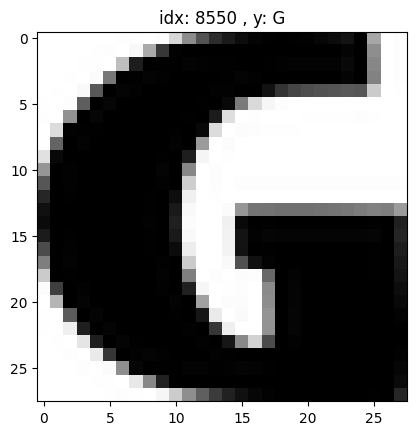

In [8]:
rand_i = np.random.randint(0, x.shape[0])

plt.title( f'idx: {rand_i} , y: {"ABCDEFGHIJ"[ int(y[rand_i]) ]}' )
plt.imshow( x[rand_i, :, :, 0], cmap='Greys' )
plt.show()

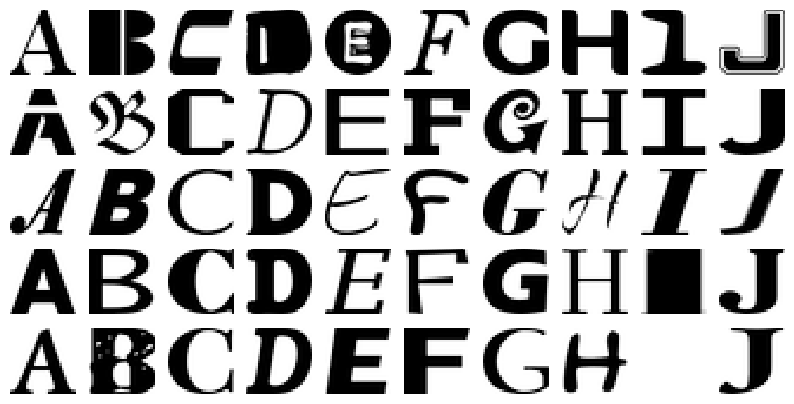

In [9]:
rows = 5
fig, axes = plt.subplots(rows, classes, figsize=(classes,rows))

for letter_id in range(classes) :
    letters = x[y==letter_id]      # 0부터 9까지 각 숫자에 맞는 array가 letters에 들어간다.
    letters_len = len(letters)

    for row_i in range(rows) :
        axe = axes[row_i, letter_id]
        axe.imshow( letters[np.random.randint(letters_len)], cmap='Greys', interpolation='none')
        axe.axis('off')

## Data Preprocessing

* Data split
    - training set : test set = 8 : 2
    - training set : validation set = 8 : 2
    - 재연을 위한 난수 고정 : 2023

In [10]:
from numpy.random.mtrand import random
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=2023)

In [11]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=2023)
train_x.shape, val_x.shape, test_x.shape

((11983, 28, 28, 1), (2996, 28, 28, 1), (3745, 28, 28, 1))

* Scaling

    - min-max scaling

In [13]:
max_n, min_n = train_x.max(), train_x.min()
train_x = (train_x - min_n)/(max_n-min_n)
val_x = (val_x - min_n)/(max_n-min_n)
test_x = (test_x - min_n)/(max_n-min_n)
train_x.max(), train_x.min()

(1.0, 0.0)

* One-hot encoding

In [14]:
from tensorflow.keras.utils import to_categorical

In [17]:
class_n = len(np.unique(train_y))
class_n

10

In [18]:
train_y = to_categorical(train_y, class_n)
val_y = to_categorical(val_y, class_n)
test_y = to_categorical(test_y, class_n)

* Data shape 재확인

In [19]:
train_x.shape, train_y.shape, val_x.shape, val_y.shape, test_x.shape, test_y.shape

((11983, 28, 28, 1),
 (11983, 10),
 (2996, 28, 28, 1),
 (2996, 10),
 (3745, 28, 28, 1),
 (3745, 10))

## **Image Data Augmentation**

- ImageDataGenerator : [**전체 옵션 참고**](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)
- .flow( )

In [20]:
!mkdir output

In [21]:
!ls output

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
# 데이터 제너레이터를 선언함! 제너레이팅 규칙과 함께!
trainIDG = ImageDataGenerator(rescale=1./255,         # 사실 이 부분은 전처리 과정에서 했다.
                              zca_whitening=True,     # apply ZCA whitening
                              rotation_range=30,      # randomly rotate images in the range (degrees, 0 to 180)
                              zoom_range = 0.2,       # randomly zoom image
                              width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                              height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
                              horizontal_flip=True,   # randomly flip images
                              vertical_flip=True)     # randomly flip images

# 옵션에 따라 필요할 수도 있고 그렇지 않을 수 있다.
trainIDG.fit(train_x)

# 학습 할 때마다, '실시간'으로 데이터를 생성하여 학습에 활용하고, 버리고를 반복할 준비!
flow_trainIDG = trainIDG.flow(train_x, train_y,
                              batch_size=128,
                            #   save_to_dir='output',
                            #   save_prefix='train',
                            #   save_format='png'
                              )

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1444: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn(


In [24]:
!ls output

In [25]:
valIDG = ImageDataGenerator(rescale=1./255)

flow_valIDG = valIDG.flow(val_x, val_y,
                          batch_size=128,
                        #   save_to_dir='output',
                        #   save_prefix='val',
                        #   save_format='png'
                          )

## Modeling : CNN

- 조건
    1. Sequential API, Functiona API 중 택일.
    2. [이 구조를 미니 버전으로 활용해봐도 좋다.](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99DFA5415B38AC752E)
    3. DropOut, BatchNormalization 등의 기능도 같이 활용해보자.
    4. Early Stopping을 사용할 것.

In [27]:
import tensorflow as tf
from tensorflow import keras

In [33]:
# 세션 클리어
keras.backend.clear_session()
# 레이어 엮기
X = keras.layers.Input(shape=(28, 28, 1))
H = keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(X)
H = keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = keras.layers.BatchNormalization()(H)
H = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(H)

H = keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = keras.layers.BatchNormalization()(H)
H = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(H)

H = keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = keras.layers.BatchNormalization()(H)
H = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(H)

H = keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = keras.layers.BatchNormalization()(H)
#H = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(H)

H = keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = keras.layers.BatchNormalization()(H)

H = keras.layers.Flatten()(H)
H = keras.layers.Dense(1024, activation='relu')(H)
H = keras.layers.Dense(1024, activation='relu')(H)
Y = keras.layers.Dense(10, activation='softmax')(H)

# 모델 시작과 끝 지정
model = keras.models.Model(X,Y)

# 모델 컴파일
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics='accuracy')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856 

* Early Stopping

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
es = EarlyStopping(monitor='val_loss', min_delta=0, verbose=1, patience=5, restore_best_weights=True)

* .fit( )
    - Image Data Augmentation 과정에서 생성한 ImageDataGenerator를 사용해야 한다.

In [35]:
model.fit(flow_trainIDG, epochs=1000, verbose=1, validation_data=flow_valIDG,
          callbacks=[es])

Epoch 1/1000
94/94 [==============================] - 48s 191ms/step - loss: 2.5006 - accuracy: 0.1515 - val_loss: 2.3638 - val_accuracy: 0.1135
Epoch 2/1000
94/94 [==============================] - 18s 188ms/step - loss: 1.8400 - accuracy: 0.2621 - val_loss: 4.9335 - val_accuracy: 0.1135
Epoch 3/1000
94/94 [==============================] - 16s 174ms/step - loss: 1.4380 - accuracy: 0.4408 - val_loss: 5.8189 - val_accuracy: 0.0895
Epoch 4/1000
94/94 [==============================] - 19s 204ms/step - loss: 1.0896 - accuracy: 0.6321 - val_loss: 4.8870 - val_accuracy: 0.1142
Epoch 5/1000
 8/94 [=>............................] - ETA: 12s - loss: 0.9592 - accuracy: 0.6748

KeyboardInterrupt: ignored

In [ ]:
!ls output

* .evaluate( )

* .predict( )

In [ ]:
y_pred =

In [ ]:
# 원핫 인코딩 한 것을 다시 묶어주는 코드
# 평가 지표 및 실제 데이터 확인을 위해 필요

y_pred_arg =
test_y_arg =

* 평가 지표

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(test_y_arg, y_pred_arg)

In [ ]:
print( classification_report(test_y_arg, y_pred_arg) )

## Visualization

* 실제 데이터 확인

In [ ]:
letters_str = "ABCDEFGHIJ"

rand_idx = np.random.randint(0, len(y_pred_arg))
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx], cmap='Greys')
plt.show()

* 틀린 이미지만 확인해보기

In [ ]:
temp = (test_y_arg == y_pred_arg)
false_idx = np.where(temp==False)[0]
false_len = len(false_idx)
false_len

In [ ]:
letters_str = "ABCDEFGHIJ"

rand_idx = false_idx[np.random.randint(0, false_len)]
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx], cmap='Greys')
plt.show()